In [1]:
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np 

C:\Users\enesm\AppData\Roaming\Python\Python310\site-packages\cupy\_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda11x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [4]:
train=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\3-Encoded\train_encoded.csv')
test=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\3-Encoded\test_encoded.csv')

In [5]:
train

,merchant_id,month_id,mcc_id,net_payment_count,year,month,Merchant Source - 1,Merchant Source - 2,Merchant Source - 3,Settlement Period - 1,...,Working Type - 1,Working Type - 2,Working Type - 3,Working Type - 4,Working Type - 5,Working Type - 6,Segment - 1,Segment - 2,Segment - 3,Segment - 4
0,merchant_43992,202001,91,4997.0,2020,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,merchant_47611,202001,154,19878.0,2020,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,merchant_26604,202001,34,2528.0,2020,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,merchant_50657,202001,111,89.0,2020,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,merchant_60635,202001,129,71957.0,2020,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291137,merchant_67083,202309,64,4.0,2023,9,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
291138,merchant_4263,202309,148,4.0,2023,9,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
291139,merchant_11346,202309,64,3.0,2023,9,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
291140,merchant_21397,202309,63,3.0,2023,9,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [12]:
# Assuming 'train' is your DataFrame
train['date'] = pd.to_datetime(train['year'].astype(str) + train['month'].astype(str), format='%Y%m')

In [13]:
# Assuming 'train' is your DataFrame
test['date'] = pd.to_datetime(test['year'].astype(str) + test['month'].astype(str), format='%Y%m')

In [14]:
test

,merchant_id,mcc_id,year,month,Merchant Source - 1,Merchant Source - 2,Merchant Source - 3,Settlement Period - 1,Settlement Period - 2,Settlement Period - 3,...,Working Type - 2,Working Type - 3,Working Type - 4,Working Type - 5,Working Type - 6,Segment - 1,Segment - 2,Segment - 3,Segment - 4,date
0,merchant_36004,40,2023,10,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,2023-10-01
1,merchant_23099,103,2023,10,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,2023-10-01
2,merchant_13105,51,2023,10,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,2023-10-01
3,merchant_32059,0,2023,10,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,2023-10-01
4,merchant_63368,108,2023,10,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,2023-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78175,merchant_5038,1,2023,12,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,2023-12-01
78176,merchant_49937,142,2023,12,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,2023-12-01
78177,merchant_6213,137,2023,12,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,2023-12-01
78178,merchant_35969,11,2023,12,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,2023-12-01


In [15]:
# train['Year_Month'] = train['year'].astype(str) + '-' + train['month'].astype(str).str.zfill(2)
# test['Year_Month'] = test['year'].astype(str) + '-' + test['month'].astype(str).str.zfill(2)

In [16]:
train

,merchant_id,mcc_id,net_payment_count,year,month,Merchant Source - 1,Merchant Source - 2,Merchant Source - 3,Settlement Period - 1,Settlement Period - 2,...,Working Type - 2,Working Type - 3,Working Type - 4,Working Type - 5,Working Type - 6,Segment - 1,Segment - 2,Segment - 3,Segment - 4,date
0,merchant_43992,91,4997.0,2020,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,2020-01-01
1,merchant_47611,154,19878.0,2020,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,2020-01-01
2,merchant_26604,34,2528.0,2020,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,2020-01-01
3,merchant_50657,111,89.0,2020,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,2020-01-01
4,merchant_60635,129,71957.0,2020,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291137,merchant_67083,64,4.0,2023,9,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,2023-09-01
291138,merchant_4263,148,4.0,2023,9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,2023-09-01
291139,merchant_11346,64,3.0,2023,9,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,2023-09-01
291140,merchant_21397,63,3.0,2023,9,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,2023-09-01


In [17]:
train.drop(columns=['month_id',],axis=1,inplace=True)
test.drop(columns=['month_id','net_payment_count',],axis=1,inplace=True)

KeyError: "['month_id'] not found in axis"

In [21]:
train.to_csv('train_date.csv',index=False)
test.to_csv('test_date.csv',index=False)


# Split the data

In [22]:
train

,merchant_id,mcc_id,net_payment_count,year,month,Merchant Source - 1,Merchant Source - 2,Merchant Source - 3,Settlement Period - 1,Settlement Period - 2,...,Working Type - 1,Working Type - 2,Working Type - 3,Working Type - 4,Working Type - 5,Working Type - 6,Segment - 1,Segment - 2,Segment - 3,Segment - 4
0,14423,91,4997.0,2020,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,16013,154,19878.0,2020,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,7076,34,2528.0,2020,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,17299,111,89.0,2020,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,21655,129,71957.0,2020,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291137,24345,64,4.0,2023,9,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
291138,13856,148,4.0,2023,9,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
291139,614,64,3.0,2023,9,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
291140,4869,63,3.0,2023,9,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
X=train.drop('net_payment_count',axis=1)
y=train[['net_payment_count']]

In [24]:
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Assuming 'X' and 'y' are already aligned by date and sorted chronologically

# Initialize TimeSeriesSplit
n_splits = 12  # Define the number of splits for the cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the metrics for each fold
mae_train_scores = []
mae_valid_scores = []

# Iterate over each train-test split
for train_index, test_index in tscv.split(X):
    # Split the data into the current train and test set for this fold
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    # Create the LightGBM datasets
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid)

    # Define the model parameters
    params = {
    }
    
    # Train the model
    model = lgb.train(params, lgb_train, valid_sets=[lgb_valid])
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    # Calculate and print the MAE for the current fold
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    mae_train_scores.append(mae_train)
    mae_valid_scores.append(mae_valid)
    
    print(f"Fold {len(mae_train_scores)} - MAE Train: {mae_train:.4f}, MAE Validation: {mae_valid:.4f}")

# Optionally, calculate the average MAE across all folds
avg_mae_train = sum(mae_train_scores) / n_splits
avg_mae_valid = sum(mae_valid_scores) / n_splits
print(f"Average MAE - Train: {avg_mae_train:.4f}, Validation: {avg_mae_valid:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 22402, number of used features: 16
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 245.992367
Fold 1 - MAE Train: 163.0135, MAE Validation: 445.2432
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points

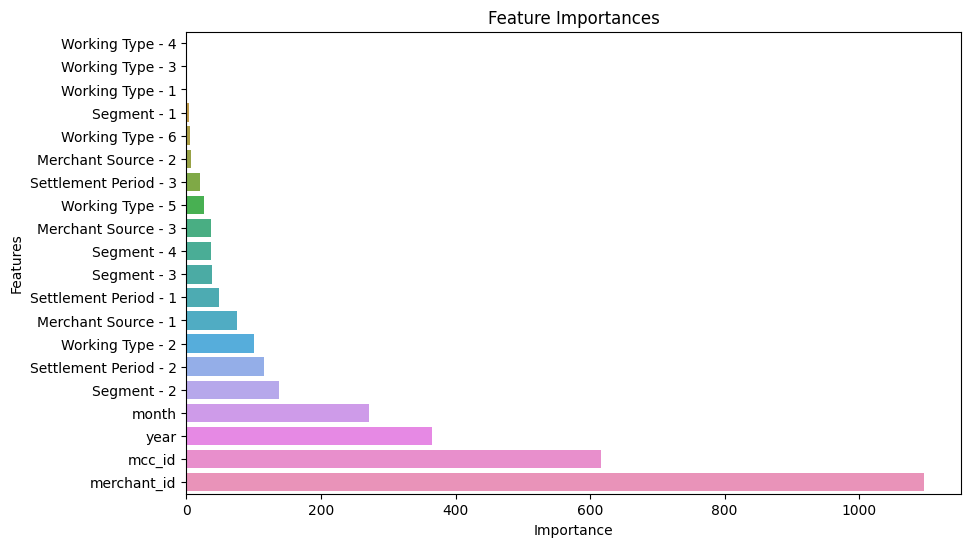

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = model.feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a pandas Series for easy plotting
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances
sorted_importances = importances.sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [26]:
# Retrain the model on the entire dataset
full_train_set = lgb.Dataset(X, label=y)
final_model = lgb.train(params, full_train_set)

# Assuming 'X_test' is your test feature matrix
y_test_pred = final_model.predict(test)

# y_test_pred now contains the predicted values for the test set


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 291142, number of used features: 20
[LightGBM] [Info] Start training from score 415.384201


In [27]:
sample_sub=pd.read_csv('sample_submission.csv')
sample_sub['net_payment_count']=y_test_pred

In [28]:
np.median(y_test_pred)

28.6958382539809

In [29]:
sample_sub.to_csv('1st_submission.csv',index=False)

# Baseline
Average MAE 11fold expanding - Train: 261.8051, Validation: 516.3086
Average MAE 12fold expanding- Train: 259.3122, Validation: 496.8049

# KNN

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
train['date'] = pd.to_datetime(train['year'].astype(str) + train['month'].astype(str), format='%Y%m')

# Aggregate net_payment_count monthly for each merchant
monthly_sum_data = train.groupby(['merchant_id', 'date']).agg({'net_payment_count':'sum'})

# Prepare pivot table with raw values
pivot_sum_data = monthly_sum_data.pivot(index='merchant_id', columns='date', values='net_payment_count').fillna(0)

# Normalize
scaler = StandardScaler()
normalized_sum_data = scaler.fit_transform(pivot_sum_data)

# Clustering
kmeans = KMeans(n_clusters=5)  # Example: 5 clusters
clusters = kmeans.fit_predict(normalized_sum_data)

# Adding cluster information to the pivot table
pivot_sum_data['cluster'] = clusters



KeyError: 'merchant_id'

In [ ]:
pivot_sum_data[pivot_sum_data['cluster']==0]

date,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,cluster
merchant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0,15.0,7.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,4.0,4.0,4.0,6.0,4.0,0.0,3.0,4.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,13.0,11.0,20.0,19.0,19.0,39.0,74.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,5.0,3.0,5.0,3.0,3.0,3.0,4.0,5.0,5.0,0
26056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
train

,merchant_id,month_id,mcc_id,net_payment_count,year,month,Merchant Source - 1,Merchant Source - 2,Merchant Source - 3,Settlement Period - 1,Settlement Period - 2,Settlement Period - 3,Working Type - 1,Working Type - 2,Working Type - 3,Working Type - 4,Working Type - 5,Working Type - 6,Segment - 1,Segment - 2,Segment - 3,Segment - 4
0,14423,202001,91,4997.0,2020,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
1,16013,202001,154,19878.0,2020,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,7076,202001,34,2528.0,2020,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3,17299,202001,111,89.0,2020,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,21655,202001,129,71957.0,2020,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291137,24345,202309,64,4.0,2023,9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
291138,13856,202309,148,4.0,2023,9,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
291139,614,202309,64,3.0,2023,9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
291140,4869,202309,63,3.0,2023,9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
pivot_sum_data

date,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,cluster
merchant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0,15.0,7.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,4.0,4.0,4.0,6.0,4.0,0.0,3.0,4.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,13.0,11.0,20.0,19.0,19.0,39.0,74.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,5.0,3.0,5.0,3.0,3.0,3.0,4.0,5.0,5.0,0
26056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:

# Reset the index of the first DataFrame to turn 'merchant_id' into a column
pivot_sum_data_reset = pivot_sum_data.reset_index()

# Merge the train DataFrame with the reset pivot DataFrame on 'merchant_id'
train_with_clusters = train.merge(pivot_sum_data_reset[['merchant_id', 'cluster']], on='merchant_id', how='left')

# 'train_with_clusters' now contains the original data from 'train' along with the corresponding cluster labels


In [ ]:
train_with_clusters_0=train_with_clusters[train_with_clusters['cluster']==0]

In [ ]:
train_with_clusters_0

,merchant_id,mcc_id,net_payment_count,year,month,Merchant Source - 1,Merchant Source - 2,Merchant Source - 3,Settlement Period - 1,Settlement Period - 2,Settlement Period - 3,Working Type - 1,Working Type - 2,Working Type - 3,Working Type - 4,Working Type - 5,Working Type - 6,Segment - 1,Segment - 2,Segment - 3,Segment - 4,date,cluster
0,14423,91,4997.0,2020,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,2020-01-01,0
1,16013,154,19878.0,2020,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,2020-01-01,0
2,7076,34,2528.0,2020,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,2020-01-01,0
3,17299,111,89.0,2020,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,2020-01-01,0
5,13294,154,86.0,2020,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,2020-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291137,24345,64,4.0,2023,9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2023-09-01,0
291138,13856,148,4.0,2023,9,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2023-09-01,0
291139,614,64,3.0,2023,9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2023-09-01,0
291140,4869,63,3.0,2023,9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2023-09-01,0


In [ ]:
# Retrain the model on the entire dataset
full_train_set = lgb.Dataset(X, label=y)
final_model = lgb.train(params, full_train_set)

# Assuming 'X_test' is your test feature matrix
y_test_pred = final_model.predict(test)

# y_test_pred now contains the predicted values for the test set
